In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time
from sklearn.mixture import GaussianMixture as GMM

In [2]:
#file = 'preped_som_rfls.pickle'
file = r'/Users/varunpatro/Desktop/preped_som_rfls.pickle'

In [3]:
spectra = pickle.load(open(file, 'rb'))

In [6]:
spectra['20220224'].shape

(80, 100, 335)

In [7]:
time_1 = spectra['20220224'].copy()
time_1_reshapen = time_1.reshape((time_1.shape[0]*time_1.shape[1],335))

In [10]:
seed = 8
gmm_4 = GMM(n_components=4, random_state=seed).fit(time_1_reshapen)


In [11]:
labels = gmm_4.predict(time_1_reshapen)
means_4 = gmm_4.means_

In [15]:
means_4.shape

(4, 335)

In [19]:
rgb_t1 = np.zeros((time_1.shape[0]*time_1.shape[1], 335))

for i in range(len(labels)): # 8000 times
    if labels[i] == 0:
        rgb_t1[i] = means_4[0]
    elif labels[i] == 1:
        rgb_t1[i] = means_4[1]
    elif labels[i] == 2:
        rgb_t1[i] = means_4[2]
    else:
        rgb_t1[i] = means_4[3]
        
    

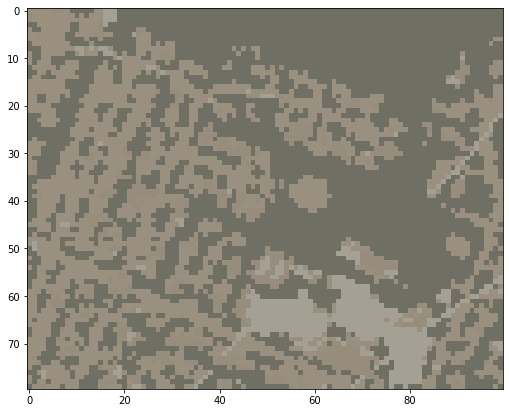

In [20]:
rgb_t1 = rgb_t1.reshape((80,100,335))

fig = plt.figure(figsize = (12, 7))
r = rgb_t1[:,:,54]
g = rgb_t1[:,:,34]
b = rgb_t1[:,:,16]
img = np.dstack((r, g, b))*10
plt.imshow(img);

z = np.ones((rgb_t1.shape[0], rgb_t1.shape[1]))
img = np.dstack((z, z, z))
plt.imshow(img, alpha = 0.3)

In [ ]:
seed = 8
# Running kmeans through all time points in time series
labels = []
km_predict_tpoints = []
inits = []
count = 0
for i in spectra.keys():
    time_point = spectra[i].copy()
    time_point_reshapen = time_point.reshape(time_point.shape[0]*time_point.shape[1], time_point.shape[2])
    if i == '20220224':
        kmeans = KMeans(init = 'k-means++', n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
    else:
        #print('count: ', count)
        #print('inits: ', inits)
        kmeans = KMeans(init = inits[count-1], n_clusters = 4, random_state = seed).fit(time_point_reshapen)
        Z = kmeans.predict(time_point_reshapen)
        clusterCount = np.bincount(kmeans.labels_)
        km_predict_tpoints.append(clusterCount)
        cluster_inits = kmeans.cluster_centers_
        inits.append(cluster_inits)
        labels.append(kmeans.labels_)
        
    count+= 1